<a href="https://colab.research.google.com/github/yongxiang-zheng/CNN-text-classification/blob/master/visual_minnesota.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Visualization


### Programming for Data Science
### Last Updated: Dec 3, 2024
---

### Instructions

Use the **matplotlib**, **plotnine**, and **plotly**  packages to perform data analysis and create informative data visualizations on an educational dataset.  

- The dataset we will be using is a subset of a larger dataset collected by the Minneapolis Public School District (MPLS) in Minnesota, USA.

- The variables in the data include student identifier (subid), reading achievement scores from grades 5 to 8, risk group (risk), gender (gen), ethnicity (eth), English language learner status (ell), special education services (sped), and attendance proportion (att).


Note that using **ChatGPT** to answer any of the questions in this programming assignment is strictly **prohibited**. This course aims to teach the basics of Python and other tools, and using ChatGPT to solve the assignment will hinder your ability to improve your essential programming skills. Violating this policy will result in an 80% deduction for the assignment.


### TOTAL POINTS: 12
---


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from plotnine import *
import plotly.express as px

#### Read in the dataset on the Minneapolis Public School District (MPLS)

In [2]:
path_to_data = "https://github.com/tcsuk/hudm5001/raw/main/programming_assignments/python/82689_01ds2.csv"
df = pd.read_csv(path_to_data)
df.head(10)

,subid,read.5,read.6,read.7,read.8,risk,gen,eth,ell,sped,att
0,1,172,185,179,194,HHM,F,Afr,0,N,0.94
1,2,200,210,209,-99,HHM,F,Afr,0,N,0.91
2,3,191,199,203,215,HHM,M,Afr,0,N,0.97
3,4,200,195,194,-99,HHM,F,Afr,0,N,0.88
4,5,207,213,212,213,HHM,F,Afr,0,N,0.85
5,6,191,189,206,195,HHM,M,Afr,0,N,0.90
6,7,199,208,213,218,POV,M,Afr,1,N,0.97
7,8,191,194,194,-99,POV,F,His,1,Y,0.97
8,9,149,154,174,177,POV,F,Afr,0,Y,0.97
9,10,200,212,213,-99,POV,F,Afr,0,N,0.96


1. **(1 PT)** Create a barplot using the `seaborn` library to display the frequency distribution of gender (*gen*) variable. Add x-label, y-label, and title using functions from the `matplotlib` library.

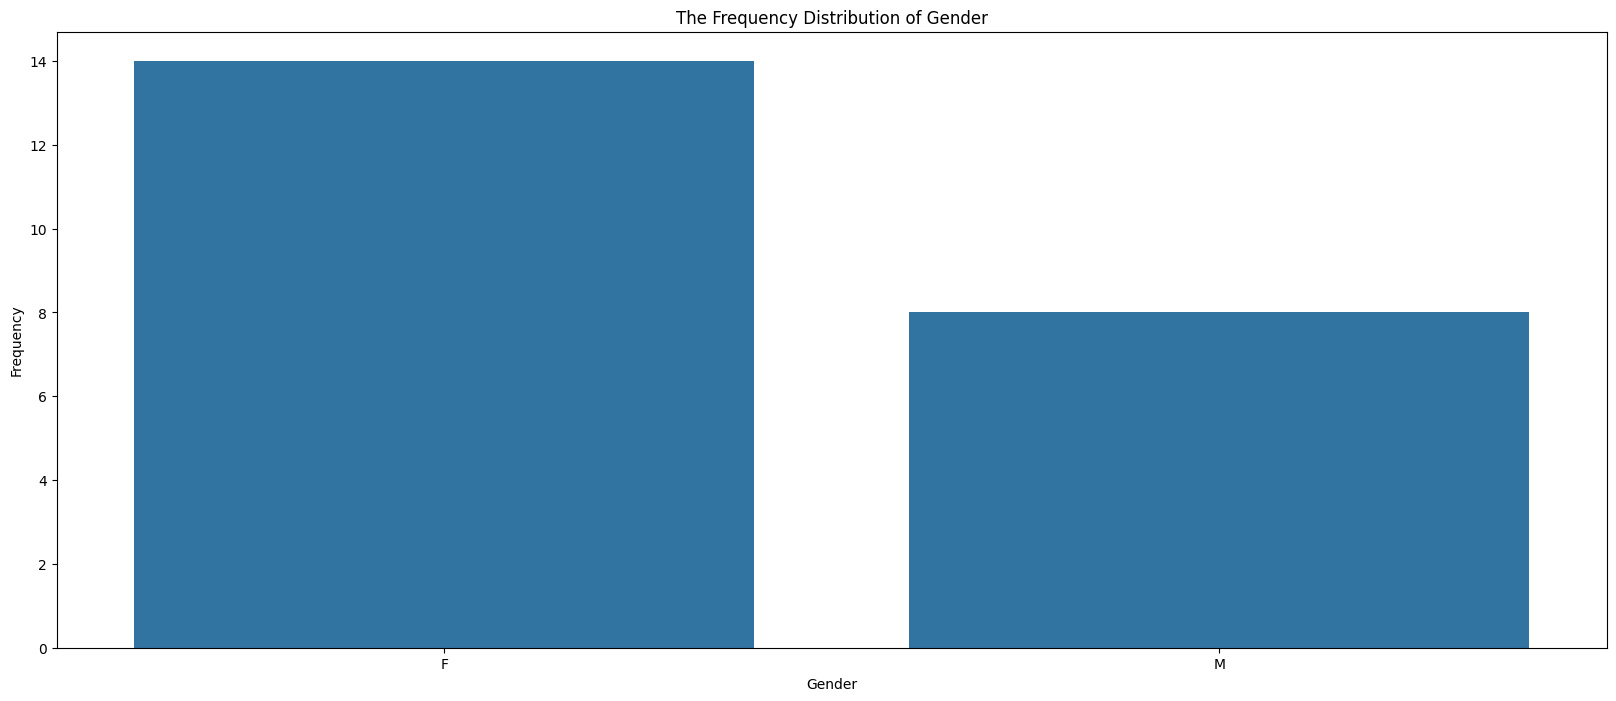

In [3]:
plt.figure(figsize=(20, 8))
sns.countplot(data=df, x='gen')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('The Frequency Distribution of Gender')
plt.show()

2. **(1 PT)** Create a set of boxplots that show the distribution of 5th-grade reading scores (*read.5*) by gender (*gen*), using `pandas` and `matplotlib` libraries. Customize the figure style as you like. Note that you can check a section of figure styles from `plt.style.available`.

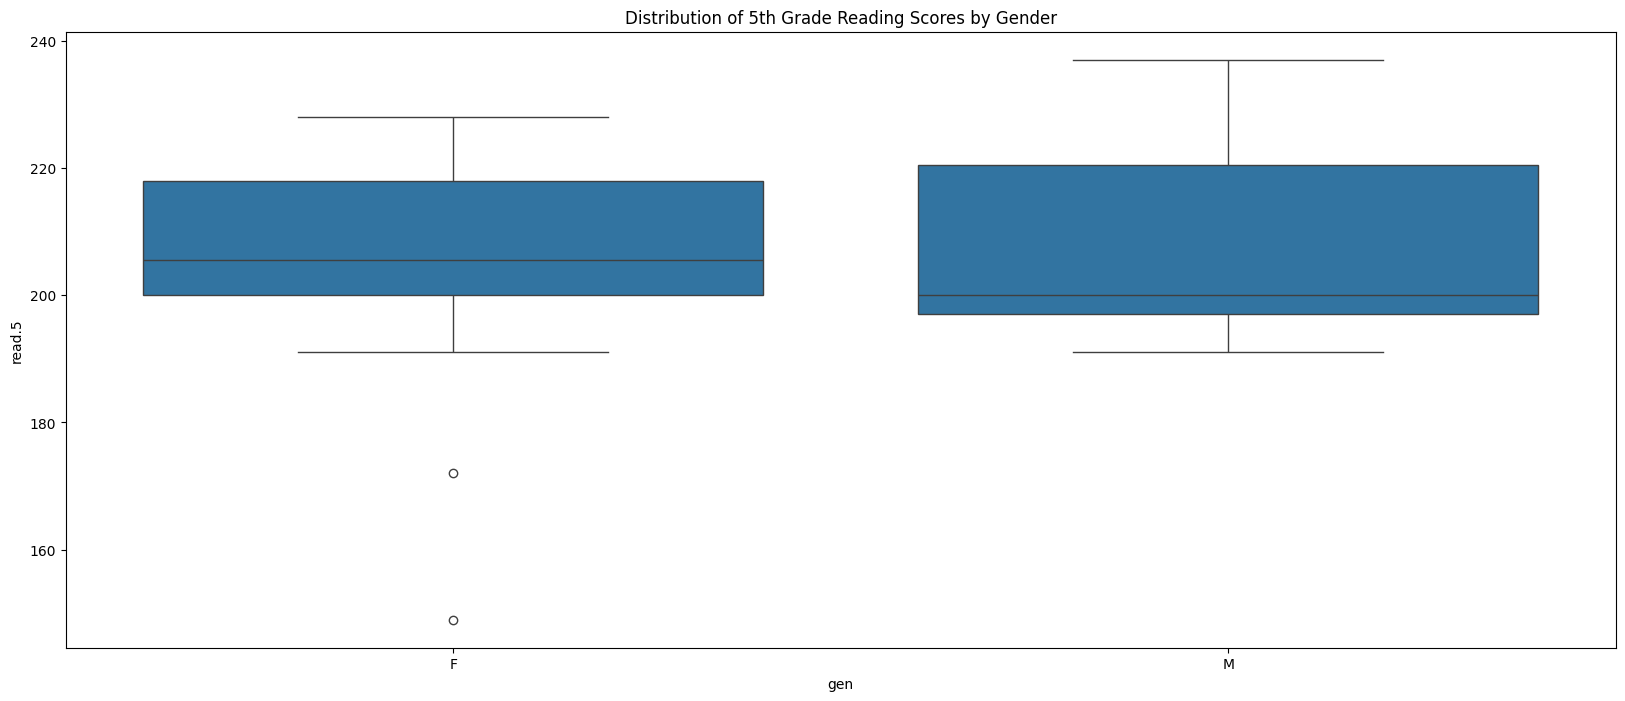

In [4]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df, x='gen', y='read.5')
plt.title('Distribution of 5th Grade Reading Scores by Gender')
plt.show()

3. **(1 PT)** Use the `ggplot` function from the `plotnine` library to create a scatterplot to examine the relationship between the attendance proportion (*att*; x variable) and 5th-grade reading scores (*read.5*; y variable). Add x-label, y-label, and title, and a smoothing line using linear regression.

    Hints: use `geom_soomth()` to fit a smoother line.

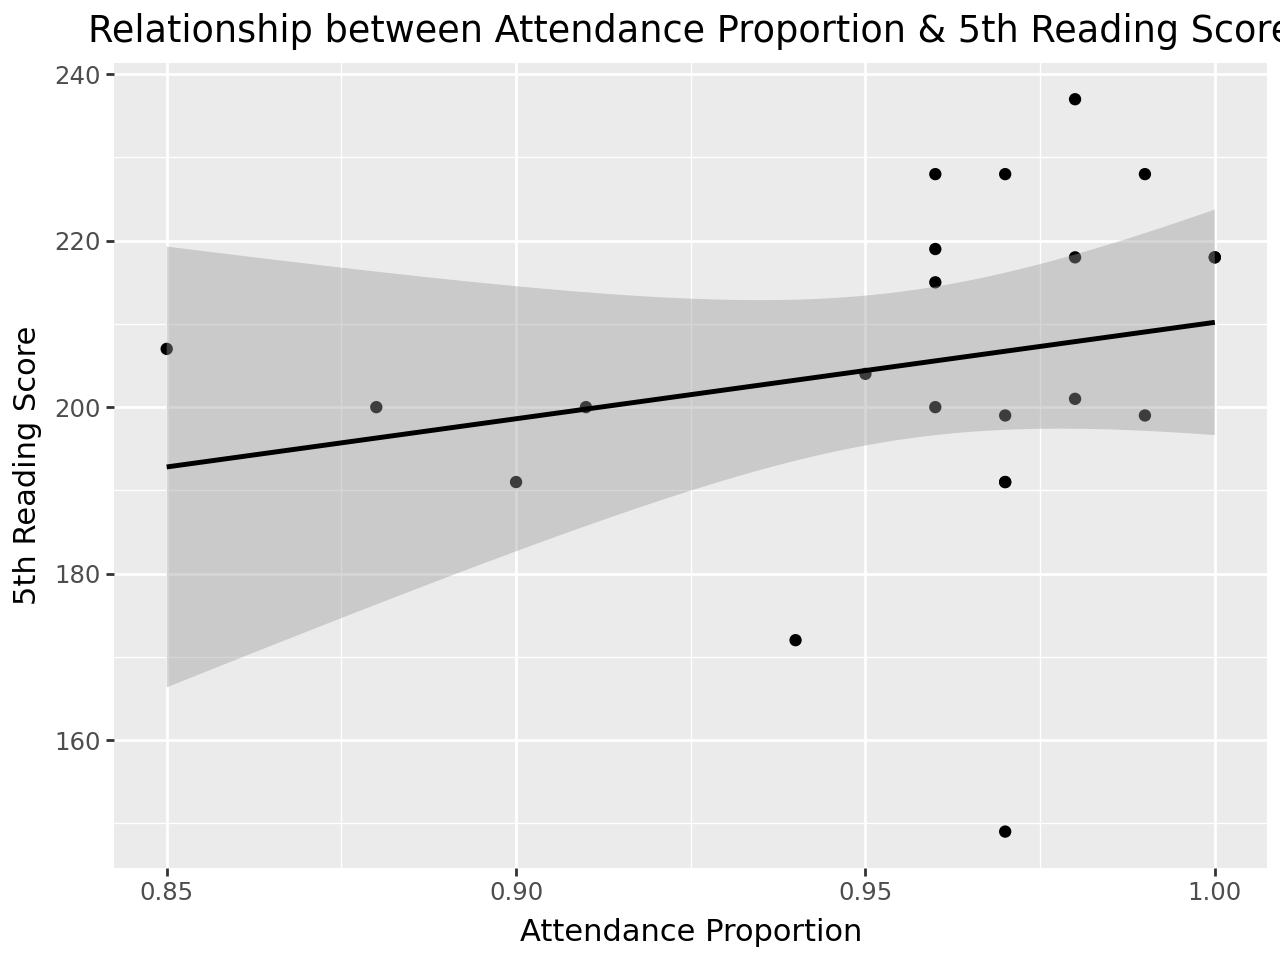

In [5]:
(ggplot(df, aes(x='att', y='read.5')) +
 geom_point() +
 geom_smooth(method='lm') +
 labs(x='Attendance Proportion', y='5th Reading Score', title='Relationship between Attendance Proportion & 5th Reading Score'))

4. **(1 PT)** Create a scatterplot using the `plotly` library to examine how attendance proportion (*att*; x variable) is related to the difference between 6th and 5th-grade reading scores (*read.6 - read.5*) and whether the relationship is different depending on ethnicity.

In [6]:
df['score_diff'] = df['read.6'] - df['read.5']
fig = px.scatter(df, x='att', y='score_diff', title='Scatter Plot of Attendance Proportion and Score Difference')
fig.show()

5. **(2 PT)** Create a set of scatterplots using facets functions from the `plotnine` library to display relations between attendance proportion (*att*) and each of the four reading scores. Values of -99 indicate missing values, so delete them when plotting.

   Hints: you need to convert the wide-format data to long-format data. [pd.melt()](https://towardsdatascience.com/reshaping-a-pandas-dataframe-long-to-wide-and-vice-versa-517c7f0995ad#:~:text=Reshape%20from%20Wide%20to%20Long%3A&text=To%20reshape%20a%20dataframe%20from,%3D%2C%20value_name%3D%2C%20ignore_index%3D) from the `pandas` library can be used.

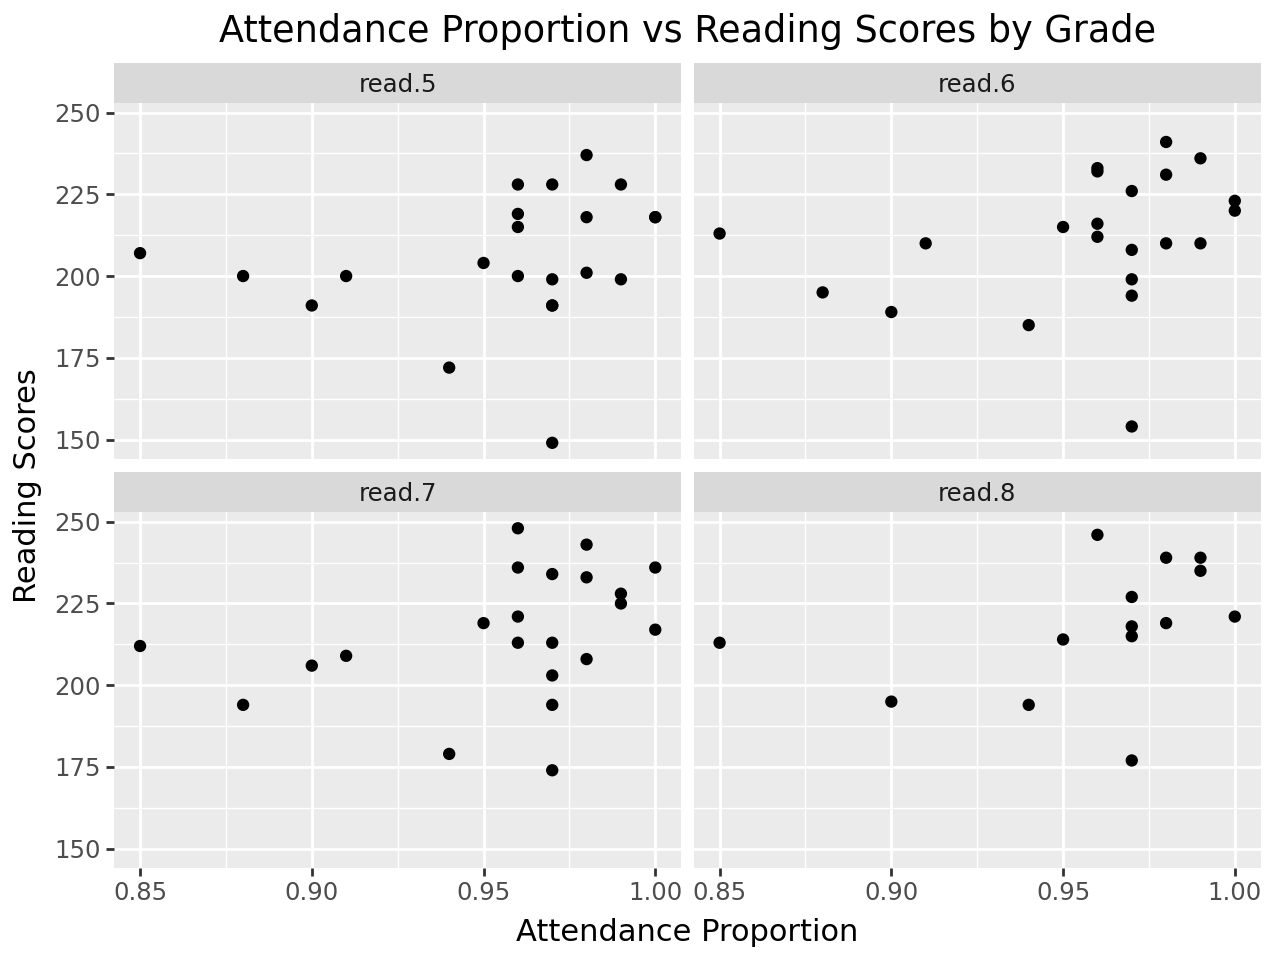

In [7]:
df_long = pd.melt(df, id_vars=['att'], value_vars=['read.5', 'read.6', 'read.7', 'read.8'], var_name='grade', value_name='score')
df_long = df_long[df_long['score'] != -99]
(ggplot(df_long, aes(x='att', y='score')) +
 geom_point() +
 facet_wrap('~grade') +
 labs(x='Attendance Proportion', y='Reading Scores', title='Attendance Proportion vs Reading Scores by Grade'))

6. **(1 PT)** Use the long-format data created for Question 5 to create an animated scatter plot of attendance proportion (*att*) and reading scores by specifying the grades to be animated.

In [8]:
fig = px.scatter(df_long, x='att', y='score', animation_frame='grade', title='Animated Scatter Plot of Attendance vs Reading Scores')
fig.show()

7. **(2 PT)**  Use 6th grader's reading scores (read.6) to create the following four subplots, using fuctions from the `plotnine` library.

- a histogram of 'read.6',
- a kernel density estimate,
- a boxplot of 'read.6',
- a set of boxplots showing the distribution of 'read.6' by 'eth' crossed with 'gen', where different color indicates each unique group by 'eth' and 'gen'.

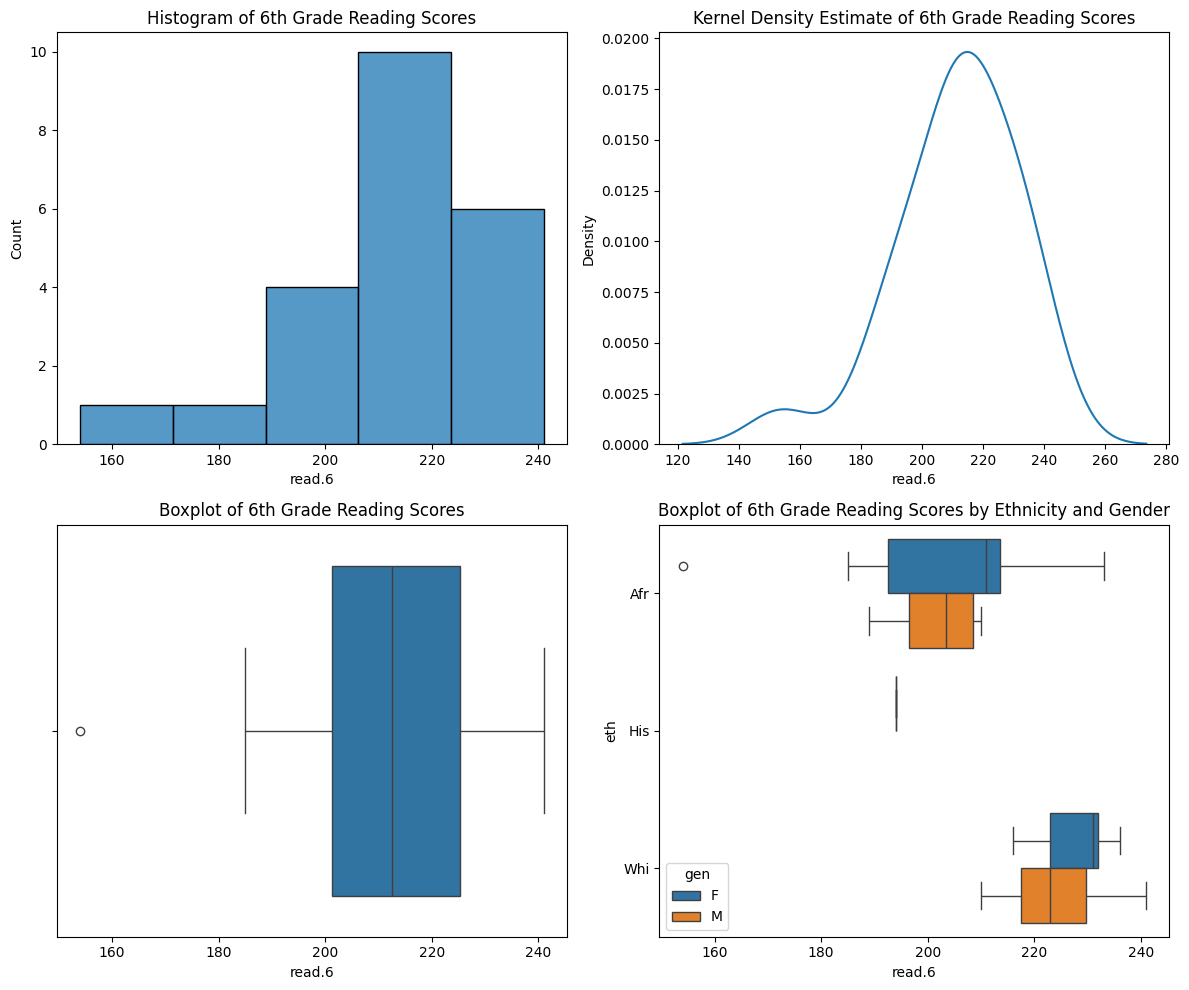

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(df['read.6'], bins=5, ax=axs[0, 0])
axs[0, 0].set_title('Histogram of 6th Grade Reading Scores')

sns.kdeplot(df['read.6'], ax=axs[0, 1])
axs[0, 1].set_title('Kernel Density Estimate of 6th Grade Reading Scores')

sns.boxplot(x=df['read.6'], ax=axs[1, 0])
axs[1, 0].set_title('Boxplot of 6th Grade Reading Scores')

sns.boxplot(data=df, x='read.6', y='eth', hue='gen', ax=axs[1, 1])
axs[1, 1].set_title('Boxplot of 6th Grade Reading Scores by Ethnicity and Gender')

plt.tight_layout()
plt.show()

8. **(2 PT)** Create a line plot to show the average trend over grades by gender. Draw two lines where one indicates the male-specific average trend and the other indicates the female-specific average trend. You can use any function to draw a line plot.

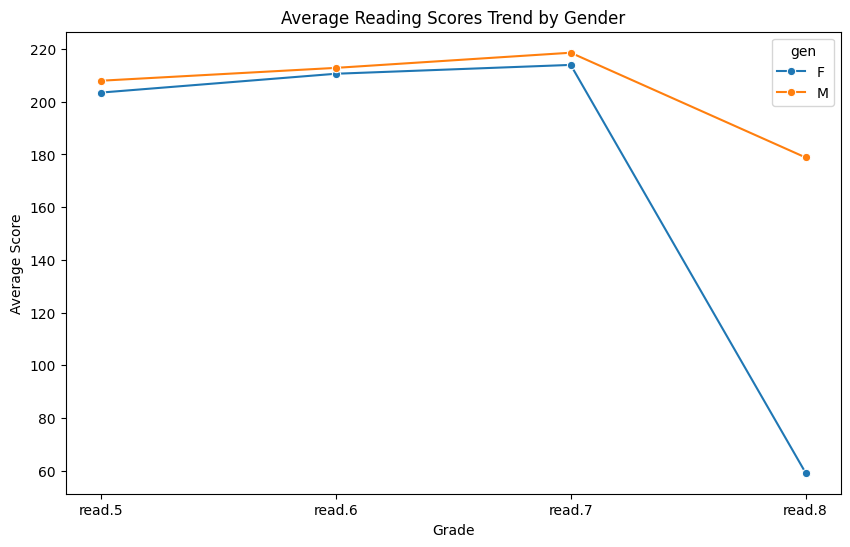

In [10]:
avg_trend = df.groupby('gen')[['read.5', 'read.6', 'read.7', 'read.8']].mean().reset_index()
avg_trend = avg_trend.melt(id_vars='gen', var_name='grade', value_name='average_score')

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_trend, x='grade', y='average_score', hue='gen', marker='o')
plt.title('Average Reading Scores Trend by Gender')
plt.ylabel('Average Score')
plt.xlabel('Grade')
plt.show()

9. **(1 PT)** Create a sunburst plot based on any available information online, using the `plotly` library. Provide the source URL and import the dataset or create a dataset properly. You also need to briefly describe the variables used in the plot.

In [11]:
sunburst_data = {'labels': ['A', 'B', 'C', 'D'], 'parents': ['', 'A', 'A', 'B'], 'values': [10, 20, 30, 40]}
sunburst_df = pd.DataFrame(sunburst_data)
fig = px.sunburst(sunburst_df, names='labels', parents='parents', values='values', title='Sample Sunburst Plot')
fig.show()